In [1]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
!git clone https://github.com/pratyush1019/Medical-Image-Computing
%cd Medical-Image-Computing


Cloning into 'Medical-Image-Computing'...
remote: Enumerating objects: 1720, done.
remote: Total 1720 (delta 0), reused 0 (delta 0), pack-reused 1720
Receiving objects: 100% (1720/1720), 55.86 MiB | 13.90 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/Medical-Image-Computing


In [2]:
from models import R2U_Net
u_net = R2U_Net()
u_net = R2U_Net().cuda()

In [3]:
from DataSetClass import RetinaDataset 
tr = torch.utils.data.DataLoader(RetinaDataset('data/training/','data/manual/'), batch_size=8, shuffle=True)
val = torch.utils.data.DataLoader(RetinaDataset('data/validation/','data/validation_manual/'), batch_size=8, shuffle=True)
import torch.optim as optim

optimizer = optim.Adam(u_net.parameters())
# criterion = F.BCELoss()
# criterion = nn.CrossEntropyLoss()
criterion = nn.functional.mse_loss
loss_history = []
for epoch in range(40):
    train_loss = 0.0
    for i,data in enumerate(tr):
        x, y = data
        x, y = x.cuda(), y.cuda()
        optimizer.zero_grad()
        y_pred = u_net(x)
        loss = criterion(y_pred, y)
        x = loss.item()
        train_loss += x
        if (i%10==0):
            print('(%d, %5d) item-loss: %.9f'%(epoch + 1, i + 1, x))
        loss.backward()
        optimizer.step()   
    print('[%d] epoch-loss: %.9f'%(epoch + 1, train_loss))
    loss_history.append(train_loss)
print('Finished Training')

(1,     1) item-loss: 0.261981964
(1,    11) item-loss: 0.171749473
(1,    21) item-loss: 0.146954939
(1,    31) item-loss: 0.141911924
(1,    41) item-loss: 0.118722811
[1] epoch-loss: 7.678190038
(2,     1) item-loss: 0.118275896
(2,    11) item-loss: 0.107716084
(2,    21) item-loss: 0.117368408
(2,    31) item-loss: 0.106239721
(2,    41) item-loss: 0.106405601
[2] epoch-loss: 5.485879004
(3,     1) item-loss: 0.099761754
(3,    11) item-loss: 0.102571920
(3,    21) item-loss: 0.098543078
(3,    31) item-loss: 0.138356686
(3,    41) item-loss: 0.109542906
[3] epoch-loss: 5.041859329
(4,     1) item-loss: 0.107634023
(4,    11) item-loss: 0.074477911
(4,    21) item-loss: 0.120232791
(4,    31) item-loss: 0.104837634
(4,    41) item-loss: 0.079607651
[4] epoch-loss: 4.756042883
(5,     1) item-loss: 0.076144882
(5,    11) item-loss: 0.093112454
(5,    21) item-loss: 0.091139644
(5,    31) item-loss: 0.076281831
(5,    41) item-loss: 0.098262146
[5] epoch-loss: 4.761510007
(6,     1)

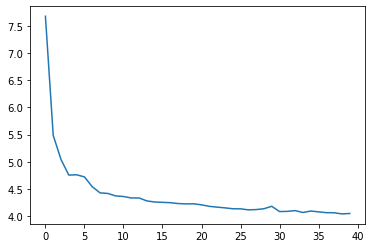

In [9]:
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [16]:
##saving the model
PATH = 'retina_r2unet_256_16_msef2.pth'
torch.save(u_net.state_dict(), PATH)
##loading the model
model = R2U_Net()
# model.load_state_dict(torch.load(PATH))
# model.eval()

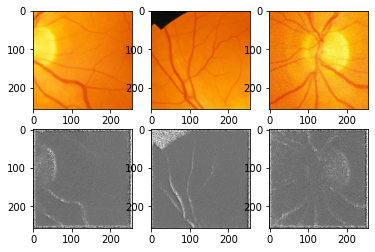

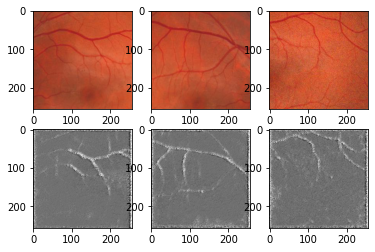

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision

for i in range(2):
    idx = 1+np.random.randint(100)
    im1 = Image.open('data/training/' + str(idx)  + '_orig.jpg')
    im2 = Image.open('data/training/' + str(idx)  + '_rot.jpg')
    im3 = Image.open('data/training/' + str(idx)  + '_noise.jpg')

    s1 = torchvision.transforms.ToTensor()(im1).unsqueeze(0)
    s2 = torchvision.transforms.ToTensor()(im2).unsqueeze(0)
    s3 = torchvision.transforms.ToTensor()(im3).unsqueeze(0)

    pred1 = model(s1).cpu().detach().numpy()
    pred2 = model(s2).cpu().detach().numpy()
    pred3 = model(s3).cpu().detach().numpy()

    f = plt.figure()
    f.add_subplot(2,3, 1)
    plt.imshow(im1)
    f.add_subplot(2,3, 2)
    plt.imshow(im2)
    f.add_subplot(2,3, 3)
    plt.imshow(im3)
    f.add_subplot(2,3, 4)
    plt.imshow(pred1[0][0],cmap='gray')
    f.add_subplot(2,3, 5)
    plt.imshow(pred2[0][0],cmap='gray')
    f.add_subplot(2,3, 6)
    plt.imshow(pred3[0][0],cmap='gray')

In [21]:
for epoch in range(10):
    train_loss = 0.0
    for i,data in enumerate(tr):
        x, y = data
        optimizer.zero_grad()
        y_pred = model(x)
        loss = F.mse_loss(y_pred, y)
        x = loss.item()
        train_loss += x
        if (i%10==0):
            print('(%d, %5d) item-loss: %.9f'%(epoch + 1, i + 1, x))
        loss.backward()
        optimizer.step()   
    print('[%d] epoch-loss: %.9f'%(epoch + 1, train_loss))
    loss_history.append(train_loss)
print('Finished Training')

(1,     1) item-loss: 0.229809374
(1,    11) item-loss: 0.233744293
(1,    21) item-loss: 0.224462196
(1,    31) item-loss: 0.229118034
(1,    41) item-loss: 0.227178887
[1] epoch-loss: 11.352388978
(2,     1) item-loss: 0.225364238
(2,    11) item-loss: 0.223464936
(2,    21) item-loss: 0.226072818
(2,    31) item-loss: 0.226733565
(2,    41) item-loss: 0.225767016
[2] epoch-loss: 11.342828780
(3,     1) item-loss: 0.228640452
(3,    11) item-loss: 0.228671700
(3,    21) item-loss: 0.224123061
(3,    31) item-loss: 0.227726102
(3,    41) item-loss: 0.227067873
[3] epoch-loss: 11.357764825
(4,     1) item-loss: 0.228739053
(4,    11) item-loss: 0.229904011
(4,    21) item-loss: 0.222785980
(4,    31) item-loss: 0.230193675
(4,    41) item-loss: 0.226390541
[4] epoch-loss: 11.350522131
(5,     1) item-loss: 0.226893544
(5,    11) item-loss: 0.225427046
(5,    21) item-loss: 0.227740422
(5,    31) item-loss: 0.226278871
(5,    41) item-loss: 0.226741046
[5] epoch-loss: 11.343708172
(6,  

FileNotFoundError: ignored

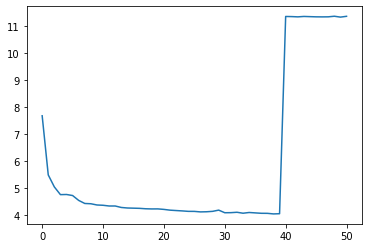

In [22]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
##saving the model
PATH = 'model/retina_unet_256_16_msef2.pth'
# torch.save(u_net.state_dict(), PATH)
##loading the model
model = R2U_Net()
model.load_state_dict(torch.load(PATH))
model.eval()
#Showing 2 random segmentations
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision

for i in range(2):
    idx = np.random.randint(100)
    im1 = Image.open('data/training/' + str(idx)  + '_orig.jpg')
    im2 = Image.open('data/training/' + str(idx)  + '_rot.jpg')
    im3 = Image.open('data/training/' + str(idx)  + '_noise.jpg')

    s1 = torchvision.transforms.ToTensor()(im1).unsqueeze(0)
    s2 = torchvision.transforms.ToTensor()(im2).unsqueeze(0)
    s3 = torchvision.transforms.ToTensor()(im3).unsqueeze(0)

    pred1 = model(s1).cpu().detach().numpy()
    pred2 = model(s2).cpu().detach().numpy()
    pred3 = model(s3).cpu().detach().numpy()

    f = plt.figure()
    f.add_subplot(2,3, 1)
    plt.imshow(im1)
    f.add_subplot(2,3, 2)
    plt.imshow(im2)
    f.add_subplot(2,3, 3)
    plt.imshow(im3)
    f.add_subplot(2,3, 4)
    plt.imshow(pred1[0][0],cmap='gray')
    f.add_subplot(2,3, 5)
    plt.imshow(pred2[0][0],cmap='gray')
    f.add_subplot(2,3, 6)
    plt.imshow(pred3[0][0],cmap='gray')

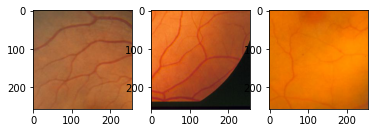

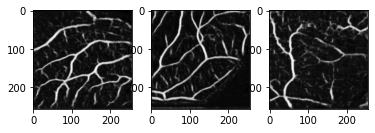

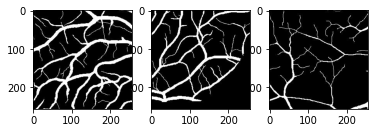

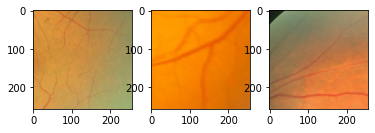

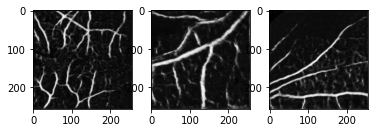

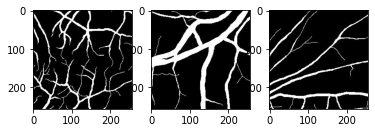

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision

for i in range(2):
    idx = 1+np.random.randint(20)
    idx2 = 1+np.random.randint(20)
    idx3 = 1+np.random.randint(20)
    im1 = Image.open('data/validation/' + str(idx)  + '_orig.jpg')
    im2 = Image.open('data/validation/' + str(idx2)  + '_orig.jpg')
    im3 = Image.open('data/validation/' + str(idx3)  + '_orig.jpg')
    im4 = Image.open('data/validation_manual/' + str(idx)  + '_orig.jpg')
    im5 = Image.open('data/validation_manual/' + str(idx2)  + '_orig.jpg')
    im6 = Image.open('data/validation_manual/' + str(idx3)  + '_orig.jpg')

    s1 = torchvision.transforms.ToTensor()(im1).unsqueeze(0)
    s2 = torchvision.transforms.ToTensor()(im2).unsqueeze(0)
    s3 = torchvision.transforms.ToTensor()(im3).unsqueeze(0)

    pred1 = u_net(s1.cuda()).cpu().detach().numpy()
    pred2 = u_net(s2.cuda()).cpu().detach().numpy()
    pred3 = u_net(s3.cuda()).cpu().detach().numpy()

    f = plt.figure()
    f.add_subplot(1,3, 1)
    plt.imshow(im1)
    f.add_subplot(1,3, 2)
    plt.imshow(im2)
    f.add_subplot(1,3, 3)
    plt.imshow(im3)
    f = plt.figure()
    f.add_subplot(1,3, 1)
    plt.imshow(pred1[0][0],cmap='gray')
    f.add_subplot(1,3, 2)
    plt.imshow(pred2[0][0],cmap='gray')
    f.add_subplot(1,3, 3)
    plt.imshow(pred3[0][0],cmap='gray')
    f = plt.figure()
    f.add_subplot(1,3, 1)
    plt.imshow(im4,cmap='gray')
    f.add_subplot(1,3, 2)
    plt.imshow(im5,cmap='gray')
    f.add_subplot(1,3, 3)
    plt.imshow(im6,cmap='gray')

In [24]:
use_gpu=True

In [25]:
def evaluate():
    tp,tn,fp,fn=0,0,0,0
    y_true, y_pred  = [], []
    with torch.no_grad():
        for i,data in enumerate(val):
            x, y = data
            if use_gpu:
                x, y = x.cuda(), y.cuda()
            # ground truth
            true_arr=np.round(y.cpu().numpy())
            true_arr=true_arr[:,0,:,:].flatten()
            y = list(np.round(y.cpu().numpy()))
            y_true += y
#             print(y)

            pred = u_net(x)
            # predicted label
#             print(np.round(pred.cpu().numpy()).shape)
            pred_arr=np.round(pred.cpu().numpy())
#             print(pred_arr[:,0,:,:].shape)
            pred_arr=pred_arr[:,0,:,:].flatten()
            pred = list(np.round(pred.cpu().numpy()))
            y_pred += pred
            eq=np.where(pred_arr==true_arr)
            neq=np.where(pred_arr!=true_arr)
            tp+=np.sum(true_arr[eq]==1)
            tn+=np.sum(true_arr[eq]==0)
            fn+=np.sum(true_arr[neq]==1)
            fp+=np.sum(true_arr[neq]==0)
#             print(len(pred_arr),len(true_arr))
#             print(pred)
#             break
        
    # calculating overall accuracy
    num_correct = 0
    num_pix = np.shape(y_true[0])[0]*np.shape(y_true[0])[1]*np.shape(y_true[0])[2]
    for i in range(len(y_true)):
        num_correct += np.sum(y_pred[i]==y_true[i])

    acc = num_correct/(len(y_true)*num_pix)
    sen = tp / (tp + fn)
    spec=tn/ (tn + fp)
    print(tp,tn,fp,fn)
    print("Accuracy: ", acc)
    print("Sensitivity: ", sen)
    print("Specificity  ", spec)
    
    return acc
evaluate()

212804 3376801 26187 316368
Accuracy:  0.9128837585449219
Sensitivity:  0.40214523822122106
Specificity   0.9923047039836755


0.9128837585449219

In [27]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = label(y_true_in > 0.5)
    y_pred = label(y_pred_in > 0.5)
    
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union
    #print('IOU {}'.format(iou))
    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    value = 0.
    for batch in range(batch_size):
        value = value + iou_metric(y_true_in[batch], y_pred_in[batch])
    return value/batch_size

def my_iou_metric(label, pred):
    metric_value = tf.py_function(iou_metric_batch, [label, pred], tf.float32)
    return metric_value

def my_iou_metric_loss(label, pred):
    loss = 1-tf.py_function(iou_metric_batch, [label, pred], tf.float32)
    #loss = -tf.map_fn(my_iou_metric_loss(label, pred), tf.range(tf.shape(pred)[0]))
    loss.set_shape((None,))

    return loss

def dice_coeff(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

def haud_dist(y_true, y_pred):
    y_true = np.squeeze(y_true)
    y_pred = np.squeeze(y_pred)
    
    return hausdorff_distance(y_true,y_pred)

def haud_dist_batch(y_true, y_pred):
    if len(y_true.shape)==2:
        return haud_dist(y_true, y_pred)
    else:
        batch_size = y_true.shape[0]
    hd = 0.
    for batch in range(batch_size):
        hd = hd + haud_dist(y_true[batch], y_pred[batch])
    return hd/batch_size

def my_haud_dist(label, pred):
    metric_value = tf.py_function(haud_dist_batch, [label, pred], tf.float32)
    return metric_value

def evalResult(gt,pred,target_size=(256,256),flag_multi_class = False,num_class = 2):
    gt = np.squeeze(gt)
    pred = np.squeeze(pred)
    
    acc = Accuracy()
    acc.update_state(np.squeeze(gt), np.squeeze(pred))
    r_acc = acc.result().numpy()
    
    pr = Precision()
    pr.update_state(np.squeeze(gt), np.squeeze(pred))
    r_pr = pr.result().numpy()
    
    rc = Recall()
    rc.update_state(np.squeeze(gt), np.squeeze(pred))
    r_rc = rc.result().numpy()
    
    mi = MeanIoU(num_class)
    mi.update_state(np.squeeze(gt), np.squeeze(pred))
    r_mi = mi.result().numpy()
    
    dc = 0.
    for img in range(gt.shape[0]):
        dc = dc + dice_coeff(gt[img], pred[img]).numpy()
    dc = dc / gt.shape[0]
    
    hd = haud_dist_batch(gt,pred)
    
    miou = iou_metric_batch(gt,pred)
    
    mae = MeanAbsoluteError()
    r_mae = mae(np.squeeze(gt), np.squeeze(pred)).numpy()

    print("Accuracy=",r_acc, "Precision=",r_pr, "Recall=",r_rc, "MeanIoU=",r_mi, "DiceCoefficient=",dc, "HD=",hd, "MyIoU=",miou, "MAE=",r_mae)

In [28]:
def focal_loss(target_tensor, prediction_tensor, weights=None, alpha=0.25, gamma=2):
    sigmoid_p = tf.nn.sigmoid(prediction_tensor)
    zeros = array_ops.zeros_like(sigmoid_p, dtype=sigmoid_p.dtype)
    
    # For poitive prediction, only need consider front part loss, back part is 0;
    # target_tensor > zeros <=> z=1, so poitive coefficient = z - p.
    pos_p_sub = array_ops.where(target_tensor > zeros, target_tensor - sigmoid_p, zeros)
    
    # For negative prediction, only need consider back part loss, front part is 0;
    # target_tensor > zeros <=> z=1, so negative coefficient = 0.
    neg_p_sub = array_ops.where(target_tensor > zeros, zeros, sigmoid_p)
    per_entry_cross_ent = - alpha * (pos_p_sub ** gamma) * tf.math.log(tf.clip_by_value(sigmoid_p, 1e-8, 1.0))                           - (1 - alpha) * (neg_p_sub ** gamma) * tf.math.log(tf.clip_by_value(1.0 - sigmoid_p, 1e-8, 1.0))
    return tf.reduce_sum(per_entry_cross_ent)

def mean_iou_loss(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.compat.v1.to_int32(y_pred > t)
        score, up_opt = tf.compat.v1.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return -tf.math.log(K.mean(K.stack(prec), axis=0))

def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

def bce_dice_loss(y_true, y_pred):
    loss = 0.4*categorical_crossentropy(y_true, y_pred) + 0.6*dice_loss(y_true, y_pred)
    return loss

def bce_dice_loss2(y_true, y_pred):
    fl = focal_loss(y_true, y_pred, gamma=5)
    loss = 0.2*categorical_crossentropy(y_true, y_pred) + 0.3*dice_loss(y_true, y_pred) + 0.5*fl
    return loss